In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install sklearn

In [ ]:
import requests
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_validate, validation_curve, learning_curve, GridSearchCV, KFold
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score, classification_report, confusion_matrix

In [ ]:
URL = "http://archive.ics.uci.edu/ml/machine-learning-databases/cmc/cmc.data"
response = requests.get(URL)
open("data.csv", "wb").write(response.content)

30962

In [ ]:
time_train = np.zeros(5)
time_predict = np.zeros(5)
f1_score = np.zeros(5)

In [ ]:
col_names=["Wife's age","Wife's education","Husband's education","Number of children ever born","Wife's religion","Wife's now working?","Husband's occupation","Standard-of-living index","Media exposure","Contraceptive method used"] 
df = pd.read_csv('data.csv', names=col_names, skipinitialspace=True,index_col=False)
df

,Wife's age,Wife's education,Husband's education,Number of children ever born,Wife's religion,Wife's now working?,Husband's occupation,Standard-of-living index,Media exposure,Contraceptive method used
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1
...,...,...,...,...,...,...,...,...,...,...
1468,33,4,4,2,1,0,2,4,0,3
1469,33,4,4,3,1,1,1,4,0,3
1470,39,3,3,8,1,0,1,4,0,3
1471,33,3,3,4,1,0,2,2,0,3


In [ ]:
df.groupby('Contraceptive method used').size()

Contraceptive method used
1    629
2    333
3    511
dtype: int64

In [ ]:
y = df["Contraceptive method used"]
X = df.drop(['Contraceptive method used'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=45, stratify=y)
X_train

,Wife's age,Wife's education,Husband's education,Number of children ever born,Wife's religion,Wife's now working?,Husband's occupation,Standard-of-living index,Media exposure
191,31,3,4,3,1,0,3,2,0
671,26,2,4,3,1,1,3,4,0
298,28,4,4,3,0,1,1,4,0
735,24,2,2,2,1,1,3,4,0
924,32,1,2,6,0,1,2,3,0
...,...,...,...,...,...,...,...,...,...
1145,45,4,4,1,1,0,1,4,0
1202,47,1,1,4,1,1,2,2,0
25,40,2,4,8,1,1,3,3,0
840,32,4,3,3,1,1,2,4,0


In [ ]:
y_train

191     1
671     3
298     1
735     3
924     3
       ..
1145    1
1202    1
25      1
840     3
513     2
Name: Contraceptive method used, Length: 1178, dtype: int64

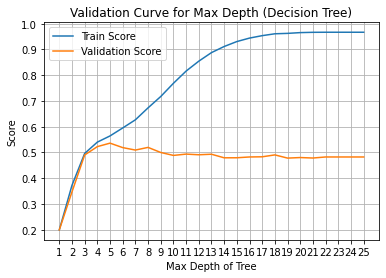

In [ ]:
clf = DecisionTreeClassifier(random_state=45)
max_depth_range = np.arange(1,26)
train_scores, test_scores = validation_curve(clf, X_train, y_train, param_range=max_depth_range, param_name='max_depth', cv=KFold(n_splits=5, shuffle=True, random_state=45), scoring="f1_macro")
plt.figure()
plt.plot(max_depth_range, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(max_depth_range, np.mean(test_scores, axis=1), label='Validation Score')
plt.legend()
plt.title("Validation Curve for Max Depth (Decision Tree)")
plt.xlabel("Max Depth of Tree")
plt.ylabel("Score")
plt.xticks(max_depth_range)
plt.grid()
plt.show()

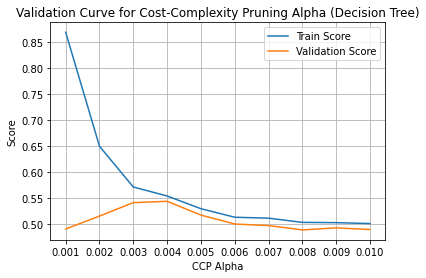

In [ ]:
ccp_alpha_range = np.linspace(0.001,0.01,10)
train_scores, test_scores = validation_curve(clf, X_train, y_train, param_range=ccp_alpha_range, param_name='ccp_alpha', cv=KFold(n_splits=5, shuffle=True, random_state=45), scoring="f1_macro")
plt.figure()
plt.plot(ccp_alpha_range, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(ccp_alpha_range, np.mean(test_scores, axis=1), label='Validation Score')
plt.legend()
plt.title("Validation Curve for Cost-Complexity Pruning Alpha (Decision Tree)")
plt.xlabel("CCP Alpha")
plt.ylabel("Score")
plt.xticks(ccp_alpha_range)
plt.grid()
plt.show()

In [ ]:
param_grid = {'max_depth': max_depth_range, 'ccp_alpha': ccp_alpha_range}

best_clf = GridSearchCV(clf, param_grid=param_grid, cv=KFold(n_splits=5, shuffle=True, random_state=45))
start_time = time.time()
best_clf.fit(X_train, y_train)
print("Best params for decision tree:",best_clf.best_params_)
end_time = time.time()
time_train[0] = end_time-start_time
print("Time to fit:",end_time -start_time)

start_time = time.time()
f1_score[0] = metrics.f1_score(y_test, best_clf.predict(X_test),average='macro')
end_time = time.time()
time_predict[0] = end_time-start_time
print("Time to predict:",end_time -start_time)

print("F1_score for best decision tree:", f1_score[0])

#confusion matrix
print("Confusion matrix for GridSearch best params:")
print(confusion_matrix(y_test, best_clf.predict(X_test)))

#f1_score of single hyperparam tuning
dt_tuning = DecisionTreeClassifier(random_state=45, max_depth=5, ccp_alpha=0.004)
dt_tuning.fit(X_train, y_train)
f1_score_tuning = metrics.f1_score(y_test, dt_tuning.predict(X_test), average='macro')
print("F1_score for optimal values found from tuning", f1_score_tuning)

#f1_score of sklearn default params
clf_default = DecisionTreeClassifier(random_state=45)
clf_default.fit(X_train, y_train)
f1score_default = metrics.f1_score(y_test, clf_default.predict(X_test), average='macro')
print("F1_score for default decision tree:", f1score_default)

Best params for decision tree: {'ccp_alpha': 0.003, 'max_depth': 6}
Time to fit: 8.055274248123169
Time to predict: 0.005816936492919922
F1_score for best decision tree: 0.5564675145420487
Confusion matrix for GridSearch best params:
[[100   3  23]
 [ 25  28  14]
 [ 43  14  45]]
F1_score for optimal values found from tuning 0.5549571590463783
F1_score for default decision tree: 0.4605709717019761


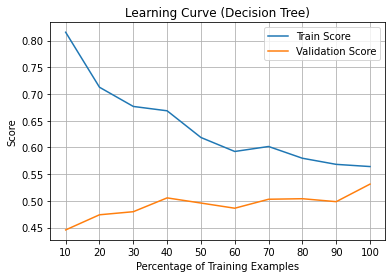

In [ ]:
classifier_decision_tree_learning = DecisionTreeClassifier(random_state=45, max_depth=best_clf.best_params_['max_depth'], ccp_alpha=best_clf.best_params_['ccp_alpha'])
_, train_scores, test_scores = learning_curve(classifier_decision_tree_learning, X_train, y_train, train_sizes=np.linspace(0.1,1.0,10),  cv=KFold(n_splits=5, shuffle=True, random_state=45), scoring="f1_macro")

plt.figure()
plt.plot(np.linspace(0.1,1.0,10)*100, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(np.linspace(0.1,1.0,10)*100, np.mean(test_scores, axis=1), label='Validation Score')
plt.legend()
plt.title("Learning Curve (Decision Tree)")
plt.xlabel("Percentage of Training Examples")
plt.ylabel("Score")
plt.xticks(np.linspace(0.1,1.0,10)*100)
plt.grid()
plt.show()

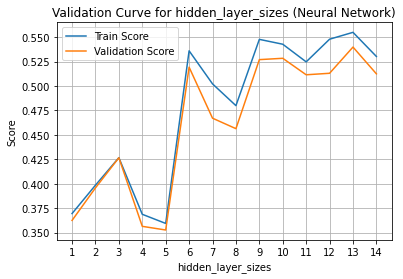

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(6,6,), random_state=45, max_iter=2000)
hidden_layer_sizes_list = np.arange(1, 15, 1)
train_scores, test_scores = validation_curve(clf, X_train, y_train, param_range=hidden_layer_sizes_list, param_name='hidden_layer_sizes', cv=KFold(n_splits=5, shuffle=True, random_state=45), scoring="f1_macro")
plt.figure()
plt.plot(hidden_layer_sizes_list, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(hidden_layer_sizes_list, np.mean(test_scores, axis=1), label='Validation Score')
plt.legend()
plt.title("Validation Curve for hidden_layer_sizes (Neural Network)")
plt.xlabel("hidden_layer_sizes")
plt.ylabel("Score")
plt.xticks(hidden_layer_sizes_list)
plt.grid()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

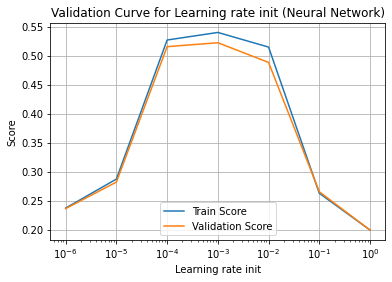

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(13,13,), random_state=45, max_iter=2000)
learning_rate_init_range = np.logspace(-6,0,7)
train_scores, test_scores = validation_curve(clf, X_train, y_train, param_range=learning_rate_init_range, param_name='learning_rate_init', cv=KFold(n_splits=5, shuffle=True, random_state=45), scoring="f1_macro")
plt.figure()
plt.semilogx(learning_rate_init_range, np.mean(train_scores, axis=1), label='Train Score')
plt.semilogx(learning_rate_init_range, np.mean(test_scores, axis=1), label='Validation Score')
plt.legend()
plt.title("Validation Curve for Learning rate init (Neural Network)")
plt.xlabel("Learning rate init")
plt.ylabel("Score")
plt.xticks(learning_rate_init_range)
plt.grid()
plt.show()

In [ ]:
param_grid = {'hidden_layer_sizes': hidden_layer_sizes_list, 'learning_rate_init': learning_rate_init_range}
best_clf = GridSearchCV(clf, param_grid=param_grid, cv=KFold(n_splits=5, shuffle=True, random_state=45))
start_time = time.time()
best_clf.fit(X_train, y_train)
print("Best params for neural network:",best_clf.best_params_)
end_time = time.time()
time_train[1] = end_time-start_time
print("Time to fit:",end_time -start_time)

start_time = time.time()
f1_score[1] = metrics.f1_score(y_test, best_clf.predict(X_test),average='macro')
end_time = time.time()
time_predict[1] = end_time-start_time
print("Time to predict:",end_time -start_time)
print("F1_score for best neural network:",f1_score[1] )

#confusion matrix
print("Confusion matrix for GridSearch best params:")
print(confusion_matrix(y_test, best_clf.predict(X_test)))

#f1_score of sklearn default params
clf_default = MLPClassifier(random_state=45)
clf_default.fit(X_train, y_train)
f1_score_default = metrics.f1_score(y_test, clf_default.predict(X_test),average='macro')
print("F1_score for default neutral network:", f1_score_default)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

Best params for neural network: {'hidden_layer_sizes': 13, 'learning_rate_init': 0.001}
Time to fit: 824.1378571987152
Time to predict: 0.006184816360473633
F1_score for best neural network: 0.5637511979294003
Confusion matrix for GridSearch best params:
[[85  8 33]
 [13 27 27]
 [28 13 61]]
F1_score for default neutral network: 0.5488593518258358


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


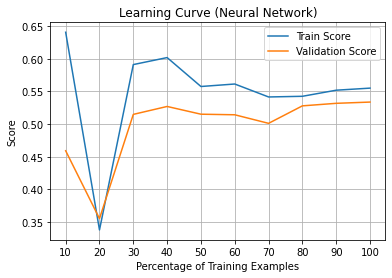

In [ ]:
classifier_neural_network = MLPClassifier(hidden_layer_sizes=(best_clf.best_params_['hidden_layer_sizes'], ), random_state=45, max_iter=2000, learning_rate_init=best_clf.best_params_['learning_rate_init'])
_, train_scores, test_scores = learning_curve(classifier_neural_network, X_train, y_train, train_sizes=np.linspace(0.1,1.0,10),  cv=KFold(n_splits=5, shuffle=True, random_state=45), scoring="f1_macro")

plt.figure()
plt.plot(np.linspace(0.1,1.0,10)*100, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(np.linspace(0.1,1.0,10)*100, np.mean(test_scores, axis=1), label='Validation Score')
plt.legend()
plt.title("Learning Curve (Neural Network)")
plt.xlabel("Percentage of Training Examples")
plt.ylabel("Score")
plt.xticks(np.linspace(0.1,1.0,10)*100)
plt.grid()
plt.show()

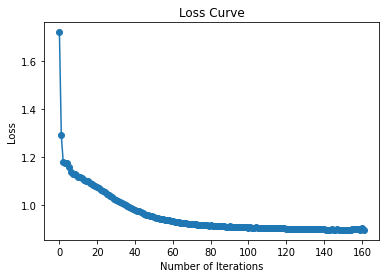

In [ ]:
classifier_neural_network.fit(X_train, y_train)

loss_curve = classifier_neural_network.loss_curve_
plt.figure()
plt.title("Loss Curve")
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.plot(loss_curve, 'o-')
plt.show()

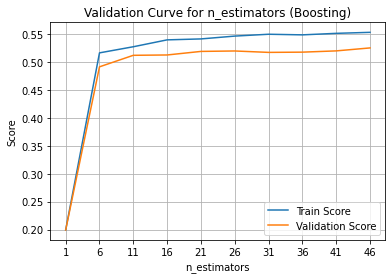

In [ ]:
clf = AdaBoostClassifier(random_state=45)
n_estimators_range = np.arange(1,50, 5)
train_scores, test_scores = validation_curve(clf, X_train, y_train, param_name="n_estimators", param_range=n_estimators_range, cv = KFold(n_splits=5, shuffle=True,random_state=45), scoring="f1_macro"
)
plt.figure()
plt.plot(n_estimators_range, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(n_estimators_range, np.mean(test_scores, axis=1), label='Validation Score')
plt.legend()
plt.title("Validation Curve for n_estimators (Boosting)")
plt.xlabel("n_estimators")
plt.ylabel("Score")
plt.xticks(n_estimators_range)
plt.grid()
plt.show()

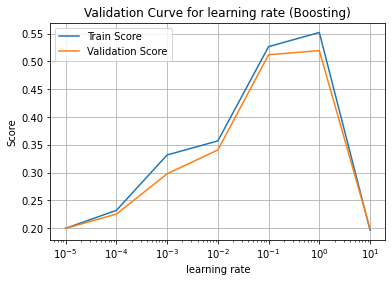

In [ ]:
clf = AdaBoostClassifier(random_state=45)
learning_rate_range = np.logspace(-5,1,7)
train_scores, test_scores = validation_curve(clf, X_train, y_train, param_name="learning_rate", param_range=learning_rate_range, cv = KFold(n_splits=5, shuffle=True,random_state=45), scoring="f1_macro")
plt.figure()
plt.semilogx(learning_rate_range, np.mean(train_scores, axis=1), label='Train Score')
plt.semilogx(learning_rate_range, np.mean(test_scores, axis=1), label='Validation Score')
plt.legend()
plt.title("Validation Curve for learning rate (Boosting)")
plt.xlabel("learning rate")
plt.ylabel("Score")
plt.xticks(learning_rate_range)
plt.grid()
plt.show()

In [ ]:
param_grid = {'n_estimators': n_estimators_range, 'learning_rate': learning_rate_range}

best_clf = GridSearchCV(clf, param_grid=param_grid, cv=KFold(n_splits=5, shuffle=True, random_state=45))
start_time = time.time()
best_clf.fit(X_train, y_train)
print("Best params for boosting:",best_clf.best_params_)
end_time = time.time()
time_train[2] = end_time-start_time
print("Time to fit:",end_time -start_time)

start_time = time.time()
f1_score[2] = metrics.f1_score(y_test, best_clf.predict(X_test),average='macro')
end_time = time.time()
time_predict[2] = end_time-start_time
print("Time to predict:",end_time -start_time)
print("F1_score for best boosting:", f1_score[2])

#confusion matrix using GridSearch best params
print("Confusion matrix for GridSearch best params:")
print(confusion_matrix(y_test, best_clf.predict(X_test)))

#optimal values from tuning
adaboost_tuning = AdaBoostClassifier(random_state=45, learning_rate=1, n_estimators=11)
adaboost_tuning.fit(X_train, y_train)
f1_score_turning = metrics.f1_score(y_test, adaboost_tuning.predict(X_test), average='macro')
print("F1_score for optimal values found from tuning", f1_score_turning)

#f1_score of sklearn default params
clf_default = AdaBoostClassifier(random_state=45)
clf_default.fit(X_train, y_train)
f1_score_default = metrics.f1_score(y_test, clf_default.predict(X_test),average='macro')
print("F1_score for default boosting:", f1_score_default)

Best params for boosting: {'learning_rate': 1.0, 'n_estimators': 46}
Time to fit: 17.275103092193604
Time to predict: 0.018217802047729492
F1_score for best boosting: 0.5503947282573236
Confusion matrix for GridSearch best params:
[[89  9 28]
 [19 26 22]
 [28 18 56]]
F1_score for optimal values found from tuning 0.5553713353428994
F1_score for default boosting: 0.5744624099433536


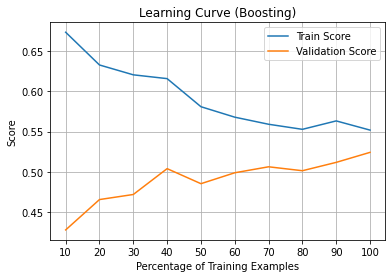

In [ ]:
#plot learning curve using grid serach best params
adaboost_gridsearch = AdaBoostClassifier(random_state=45, learning_rate=best_clf.best_params_['learning_rate'], n_estimators=best_clf.best_params_['n_estimators'])
_, train_scores, test_scores = learning_curve(adaboost_gridsearch, X_train, y_train, train_sizes=np.linspace(0.1,1.0,10),  cv=KFold(n_splits=5, shuffle=True, random_state=45), scoring="f1_macro")

plt.figure()
plt.plot(np.linspace(0.1,1.0,10)*100, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(np.linspace(0.1,1.0,10)*100, np.mean(test_scores, axis=1), label='Validation Score')
plt.legend()
plt.title("Learning Curve (Boosting)")
plt.xlabel("Percentage of Training Examples")
plt.ylabel("Score")
plt.xticks(np.linspace(0.1,1.0,10)*100)
plt.grid()
plt.show()

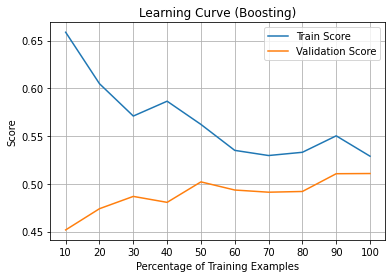

In [ ]:
#plot learning curve using optimal values found from tuning
adaboost_tuning = AdaBoostClassifier(random_state=45, learning_rate=1, n_estimators=11)
_, train_scores, test_scores = learning_curve(adaboost_tuning, X_train, y_train, train_sizes=np.linspace(0.1,1.0,10),  cv=KFold(n_splits=5, shuffle=True, random_state=45), scoring="f1_macro")

plt.figure()
plt.plot(np.linspace(0.1,1.0,10)*100, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(np.linspace(0.1,1.0,10)*100, np.mean(test_scores, axis=1), label='Validation Score')
plt.legend()
plt.title("Learning Curve (Boosting)")
plt.xlabel("Percentage of Training Examples")
plt.ylabel("Score")
plt.xticks(np.linspace(0.1,1.0,10)*100)
plt.grid()
plt.show()

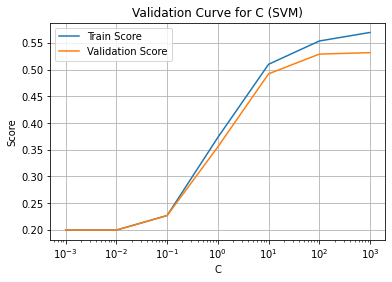

In [ ]:
c_range =np.logspace(-3,3,7)
clf = SVC(random_state=45)
train_scores, test_scores = validation_curve(clf, X_train, y_train, param_name="C", param_range=c_range, cv = KFold(n_splits=5, shuffle=True,random_state=45), scoring="f1_macro")
plt.figure()
plt.semilogx(c_range, np.mean(train_scores, axis=1), label='Train Score')
plt.semilogx(c_range, np.mean(test_scores, axis=1), label='Validation Score')
plt.legend()
plt.title("Validation Curve for C (SVM)")
plt.xlabel("C")
plt.ylabel("Score")
plt.xticks(c_range)
plt.grid()
plt.show()

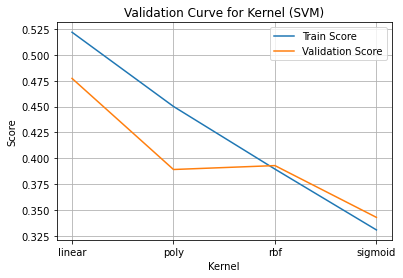

In [ ]:
kernel_range = ['linear', 'poly', 'rbf', 'sigmoid']
train_scores = np.zeros((4,1))
test_scores = np.zeros((4,1))
def get_train_test_scores(X_train, y_train, kernel):
  model = SVC(random_state=45, kernel=kernel)
  X_train_train, X_train_val, y_train_train, y_train_val = train_test_split(X_train, y_train, test_size=0.3, random_state=45)
  model.fit(X_train_train, y_train_train)
  train_scores = metrics.f1_score(y_train_train, model.predict(X_train_train),average='macro')
  test_scores = metrics.f1_score(y_train_val, model.predict(X_train_val),average='macro')
  return train_scores, test_scores
for i in range(0, 4):
  train_scores[i], test_scores[i] = get_train_test_scores(X_train, y_train, kernel_range[i])
plt.figure()
plt.plot(np.arange(4), np.mean(train_scores, axis=1), label='Train Score')
plt.plot(np.arange(4), np.mean(test_scores, axis=1), label='Validation Score')
plt.legend()
plt.title("Validation Curve for Kernel (SVM)")
plt.xlabel("Kernel")
plt.ylabel("Score")
plt.xticks(np.arange(4),kernel_range)
plt.grid()
plt.show()

In [ ]:
param_grid = {'C': c_range, 'kernel': kernel_range}

best_clf = GridSearchCV(clf, param_grid=param_grid, cv=KFold(n_splits=5, shuffle=True, random_state=45))
start_time = time.time()
best_clf.fit(X_train, y_train)
print("Best params for SVM:",best_clf.best_params_)
end_time = time.time()
time_train[3] = end_time-start_time
print("Time to fit:",end_time -start_time)

start_time = time.time()
f1_score[3] = metrics.f1_score(y_test, best_clf.predict(X_test),average='macro')
end_time = time.time()
time_predict[3] = end_time-start_time
print("Time to predict:",end_time -start_time)
print("F1_score for best SVM:", f1_score[3])

#confusion matrix using GridSearch best params
print("Confusion matrix for GridSearch best params:")
print(confusion_matrix(y_test, best_clf.predict(X_test)))

#f1_score of single hyperparam tuning
svm_tuning = SVC(random_state=45, C=100, kernel='linear')
svm_tuning.fit(X_train, y_train)
f1_score_tuning = metrics.f1_score(y_test, svm_tuning.predict(X_test),average='macro')
print("F1_score for optimal values found from tuning", f1_score_tuning)

#f1_score of sklearn default params
clf_default = SVC(random_state=45)
clf_default.fit(X_train, y_train)
f1_score_default = metrics.f1_score(y_test, clf_default.predict(X_test),average='macro')
print("F1_score for default SVN:", f1_score_default)

Best params for SVM: {'C': 1000.0, 'kernel': 'rbf'}
Time to fit: 282.5384032726288
Time to predict: 0.022136211395263672
F1_score for best SVM: 0.5319662886272595
Confusion matrix for GridSearch best params:
[[78  5 43]
 [14 26 27]
 [35 10 57]]
F1_score for optimal values found from tuning 0.5128396008846079
F1_score for default SVN: 0.39002486470674264


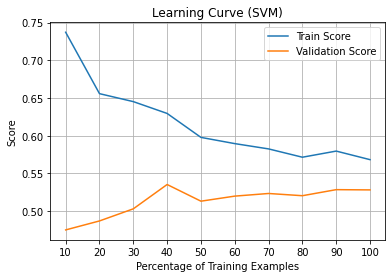

In [ ]:
classifier_svm_learning = SVC(random_state=45, C=best_clf.best_params_['C'], kernel=best_clf.best_params_['kernel'])
_, train_scores, test_scores = learning_curve(classifier_svm_learning, X_train, y_train, train_sizes=np.linspace(0.1,1.0,10),  cv=KFold(n_splits=5, shuffle=True, random_state=45), scoring="f1_macro")

plt.figure()
plt.plot(np.linspace(0.1,1.0,10)*100, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(np.linspace(0.1,1.0,10)*100, np.mean(test_scores, axis=1), label='Validation Score')
plt.legend()
plt.title("Learning Curve (SVM)")
plt.xlabel("Percentage of Training Examples")
plt.ylabel("Score")
plt.xticks(np.linspace(0.1,1.0,10)*100)
plt.grid()
plt.show()

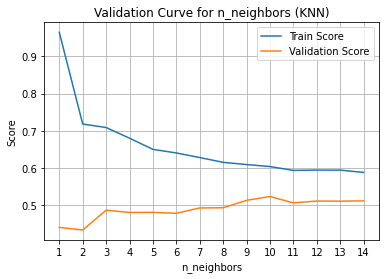

In [ ]:
clf = KNeighborsClassifier()
n_neighbors_range = np.arange(1,15)
train_scores, test_scores = validation_curve(clf, X_train, y_train, param_name="n_neighbors", param_range=n_neighbors_range, cv = KFold(n_splits=5, shuffle=True,random_state=45), scoring="f1_macro")
plt.figure()
plt.plot(n_neighbors_range, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(n_neighbors_range, np.mean(test_scores, axis=1), label='Validation Score')
plt.legend()
plt.title("Validation Curve for n_neighbors (KNN)")
plt.xlabel("n_neighbors")
plt.ylabel("Score")
plt.xticks(n_neighbors_range)
plt.grid()
plt.show()

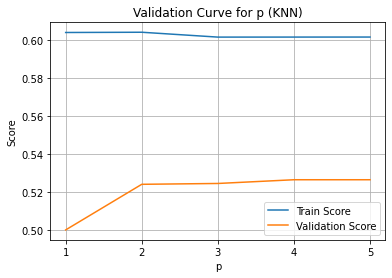

In [ ]:
clf = KNeighborsClassifier(n_neighbors=10)
p_range = np.arange(1,6)
train_scores, test_scores = validation_curve(clf, X_train, y_train, param_name="p", param_range=p_range, cv = KFold(n_splits=5, shuffle=True,random_state=45), scoring="f1_macro")
plt.figure()
plt.plot(p_range, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(p_range, np.mean(test_scores, axis=1), label='Validation Score')
plt.legend()
plt.title("Validation Curve for p (KNN)")
plt.xlabel("p")
plt.ylabel("Score")
plt.xticks(p_range)
plt.grid()
plt.show()

In [ ]:
param_grid = {'p': p_range, 'n_neighbors': n_neighbors_range}

best_clf = GridSearchCV(clf, param_grid=param_grid, cv=KFold(n_splits=5, shuffle=True, random_state=45))
start_time = time.time()
best_clf.fit(X_train, y_train)
print("Best params for KNN:",best_clf.best_params_)
end_time = time.time()
time_train[4] = end_time-start_time
print("Time to fit:",end_time -start_time)

start_time = time.time()
f1_score[4] = metrics.f1_score(y_test, best_clf.predict(X_test),average='macro')
end_time = time.time()
time_predict[4] = end_time-start_time
print("Time to predict:",end_time -start_time)
print("F1_score for best KNN:", f1_score[4])

#confusion matrix using GridSearch best params
print("Confusion matrix for GridSearch best params:")
print(confusion_matrix(y_test, best_clf.predict(X_test)))

#f1_score of sklearn default params
clf_default = KNeighborsClassifier()
clf_default.fit(X_train, y_train)
f1_score_default = metrics.f1_score(y_test, clf_default.predict(X_test),average='macro')
print("F1_score for default KNN:", f1_score_default)

Best params for KNN: {'n_neighbors': 10, 'p': 4}
Time to fit: 8.16428542137146
Time to predict: 0.03370928764343262
F1_score for best KNN: 0.5652253238460135
Confusion matrix for GridSearch best params:
[[83 12 31]
 [21 32 14]
 [31 15 56]]
F1_score for default KNN: 0.48472463907102264


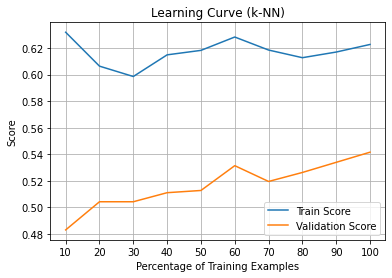

F1_score for p=2 0.5535486225141398
F1_score for p=3 0.562575115516292
F1_score for p=4 0.5652253238460135


In [ ]:
classifier_knn_learning = KNeighborsClassifier(n_neighbors=best_clf.best_params_['n_neighbors'], p=best_clf.best_params_['p'])
_, train_scores, test_scores = learning_curve(classifier_knn_learning, X_train, y_train, train_sizes=np.linspace(0.1,1.0,10), cv=KFold(n_splits=5, shuffle=True, random_state=45))

plt.figure()
plt.plot(np.linspace(0.1,1.0,10)*100, np.mean(train_scores, axis=1), label='Train Score')
plt.plot(np.linspace(0.1,1.0,10)*100, np.mean(test_scores, axis=1), label='Validation Score')
plt.legend()
plt.title("Learning Curve (k-NN)")
plt.xlabel("Percentage of Training Examples")
plt.ylabel("Score")
plt.xticks(np.linspace(0.1,1.0,10)*100)
plt.grid()
plt.show()

#f1_score of single hyperparam tuning
knn_tuning = KNeighborsClassifier(n_neighbors=10, p=2)
knn_tuning.fit(X_train, y_train)
f1_score_p2 = metrics.f1_score(y_test, knn_tuning.predict(X_test), average='macro')
print("F1_score for p=2", f1_score_p2)

knn_tuning = KNeighborsClassifier(n_neighbors=10, p=3)
knn_tuning.fit(X_train, y_train)
f1_score_p3 = metrics.f1_score(y_test, knn_tuning.predict(X_test), average='macro')
print("F1_score for p=3", f1_score_p3)

knn_tuning = KNeighborsClassifier(n_neighbors=10, p=4)
knn_tuning.fit(X_train, y_train)
f1_score_p4 = metrics.f1_score(y_test, knn_tuning.predict(X_test), average='macro')
print("F1_score for p=4", f1_score_p4)

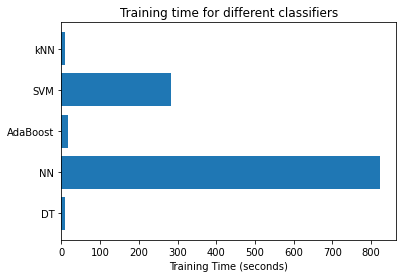

In [ ]:
classifiers = ('DT', 'NN', 'AdaBoost', 'SVM','kNN' )
y_ticks = np.arange(len(classifiers))
plt.figure()
plt.barh(y_ticks, time_train)
plt.gca().set_yticks(y_ticks)
plt.gca().set_yticklabels(classifiers)
plt.title('Training time for different classifiers')
plt.xlabel('Training Time (seconds)')
plt.show()

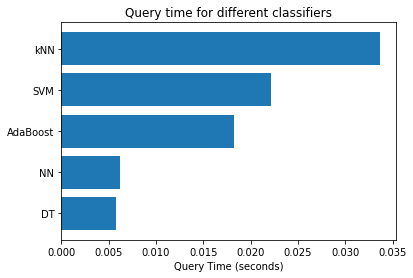

In [ ]:
plt.figure()
plt.barh(y_ticks, time_predict)
plt.gca().set_yticks(y_ticks)
plt.gca().set_yticklabels(classifiers)
plt.title('Query time for different classifiers')
plt.xlabel('Query Time (seconds)')
plt.show()

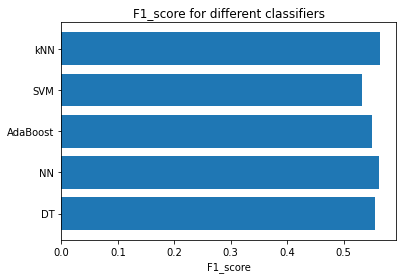

In [ ]:
plt.figure()
plt.barh(y_ticks, f1_score)
plt.gca().set_yticks(y_ticks)
plt.gca().set_yticklabels(classifiers)
plt.title('F1_score for different classifiers')
plt.xlabel('F1_score')
plt.show()